In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "lombardia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,3,Lombardia,79,25,104,127,231,65,68,...,3.0,2237.0,0.0,56.0,24.04,45.02,3.04,0.00,31.58,39.16
1,2020-02-26T18:00:00,3,Lombardia,79,25,104,145,249,18,18,...,0.0,-492.0,0.0,18.0,24.04,41.77,-3.66,0.00,0.00,7.79
2,2020-02-27T18:00:00,3,Lombardia,172,41,213,136,349,100,145,...,5.0,112.0,0.0,-9.0,19.25,61.03,129.46,0.00,64.00,40.16
3,2020-02-28T18:00:00,3,Lombardia,235,47,282,192,474,125,128,...,3.0,1515.0,0.0,56.0,16.67,59.49,8.45,0.00,14.63,35.82
4,2020-02-29T17:00:00,3,Lombardia,256,80,336,216,552,78,84,...,6.0,888.0,0.0,24.0,23.81,60.87,9.46,0.00,70.21,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2021-01-30T17:00:00,3,Lombardia,3454,377,3831,46310,50141,627,1832,...,58.0,39462.0,9230.0,665.0,9.84,7.64,4.64,19.85,-0.53,1.27
341,2021-01-31T17:00:00,3,Lombardia,3503,362,3865,47212,51077,936,1438,...,24.0,24494.0,7364.0,902.0,9.37,7.57,5.87,19.53,-3.98,1.87
342,2021-02-01T17:00:00,3,Lombardia,3489,371,3860,44615,48475,-2602,1093,...,52.0,17151.0,5714.0,-2597.0,9.61,7.96,6.37,19.13,2.49,-5.09
343,2021-02-02T17:00:00,3,Lombardia,3544,361,3905,42654,46559,-1916,912,...,63.0,22699.0,4512.0,-1961.0,9.24,8.39,4.02,20.21,-2.70,-3.95


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 3, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1738
Nuovi tamponi: 38651.0
Percentuale nuovi positivi/nuovi tamponi: 4.5 %
Nuovi guariti: 906.0
Nuovi deceduti: 46.0
Variazione positivi ricoverati con sintomi: 10.0
Variazione positivi in terapia intensiva: -2.0
Variazione positivi in isolamento dimiciliare: 778.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 3, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-05T17:00:00,3,Lombardia,6554,805,7359,108397,115756,-946,3148,...,111.0,31193.0,9364.0,-691.0,10.94,6.36,10.09,33.62,-2.07,-0.81
1,2020-12-06T17:00:00,3,Lombardia,6372,807,7179,109200,116379,623,2413,...,140.0,26026.0,7850.0,803.0,11.24,6.17,9.27,30.74,0.25,0.54
2,2020-12-07T17:00:00,3,Lombardia,6362,781,7143,108857,116000,-379,1562,...,56.0,16757.0,5184.0,-343.0,10.93,6.16,9.32,30.13,-3.22,-0.33
3,2020-12-08T17:00:00,3,Lombardia,6187,767,6954,104875,111829,-4171,1656,...,128.0,16276.0,5226.0,-3982.0,11.03,6.22,10.17,31.69,-1.79,-3.60
4,2020-12-09T17:00:00,3,Lombardia,5727,766,6493,83410,89903,-21926,1233,...,69.0,14175.0,4375.0,-21465.0,11.80,7.22,8.70,28.18,-0.13,-19.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-30T17:00:00,3,Lombardia,3454,377,3831,46310,50141,627,1832,...,58.0,39462.0,9230.0,665.0,9.84,7.64,4.64,19.85,-0.53,1.27
57,2021-01-31T17:00:00,3,Lombardia,3503,362,3865,47212,51077,936,1438,...,24.0,24494.0,7364.0,902.0,9.37,7.57,5.87,19.53,-3.98,1.87
58,2021-02-01T17:00:00,3,Lombardia,3489,371,3860,44615,48475,-2602,1093,...,52.0,17151.0,5714.0,-2597.0,9.61,7.96,6.37,19.13,2.49,-5.09
59,2021-02-02T17:00:00,3,Lombardia,3544,361,3905,42654,46559,-1916,912,...,63.0,22699.0,4512.0,-1961.0,9.24,8.39,4.02,20.21,-2.70,-3.95


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

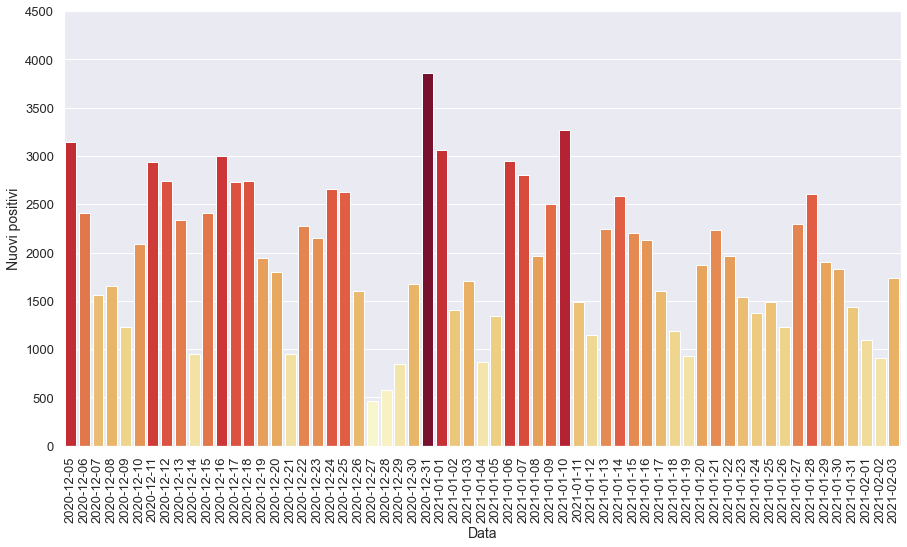

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

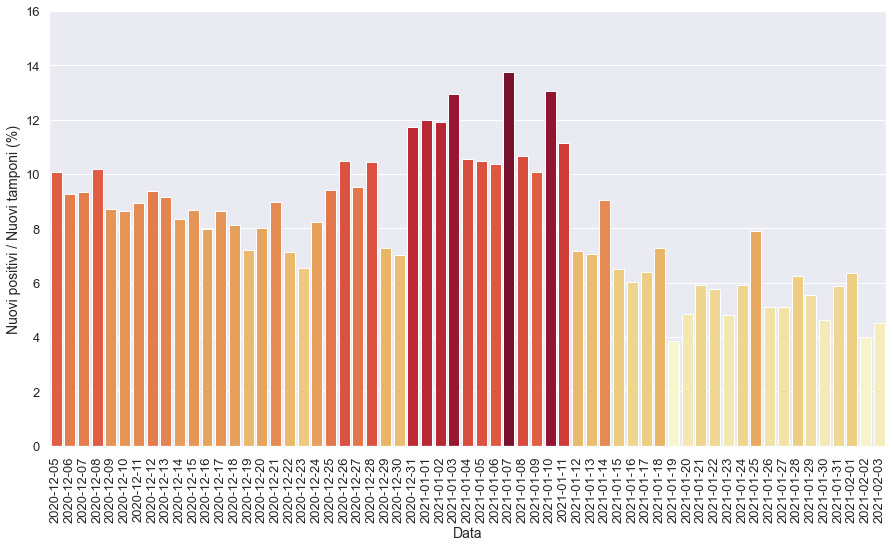

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

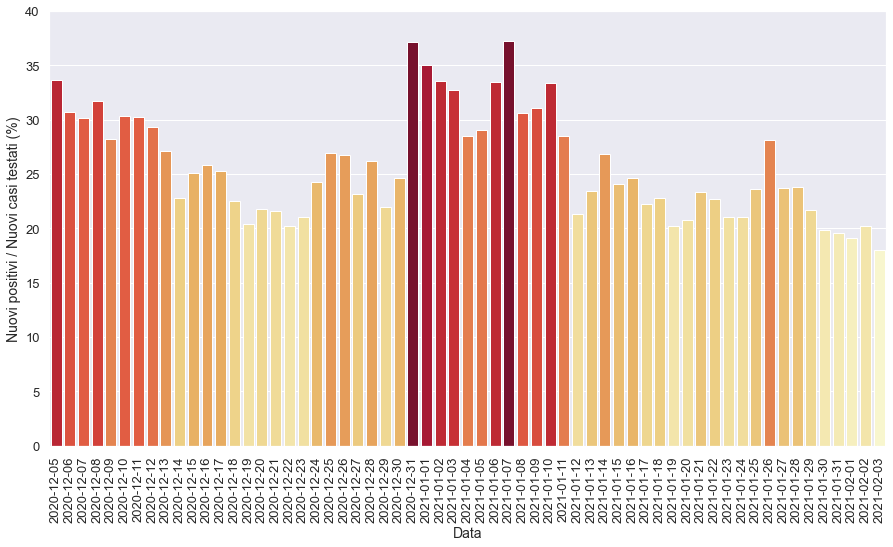

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

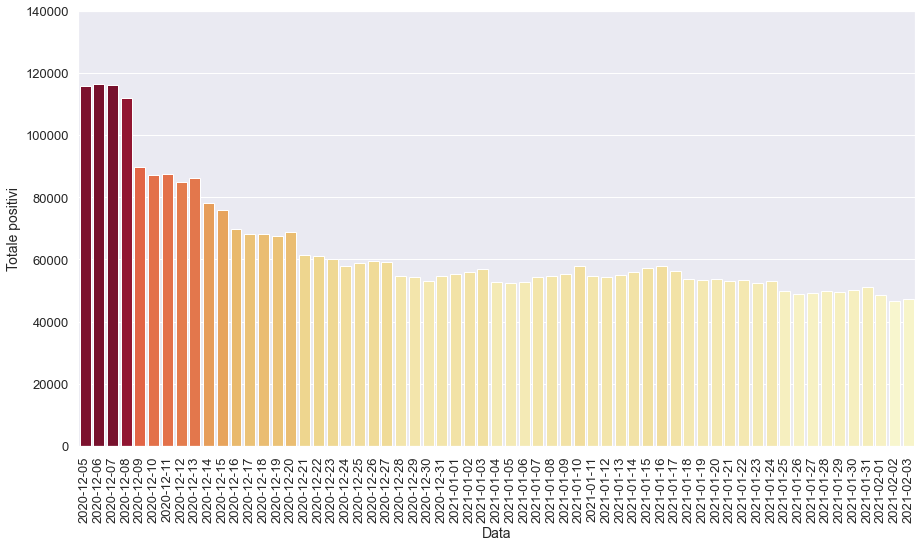

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

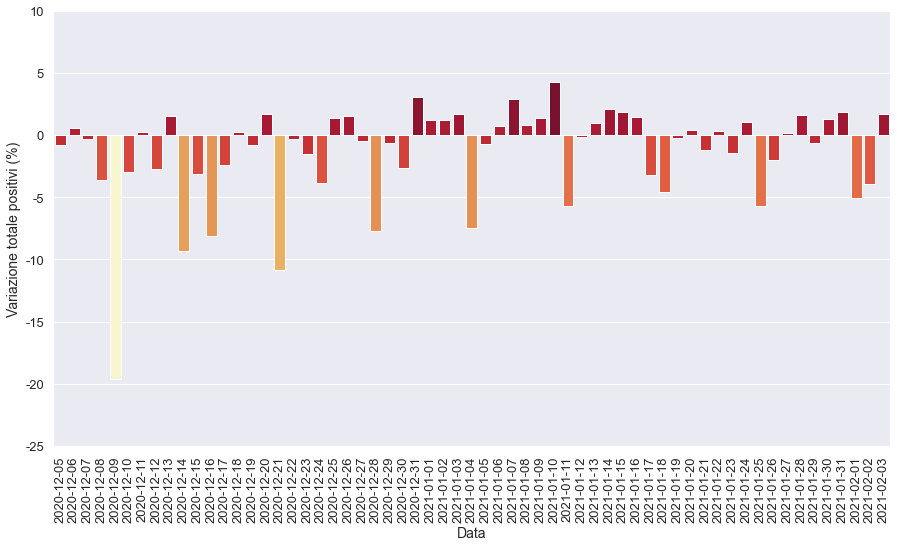

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

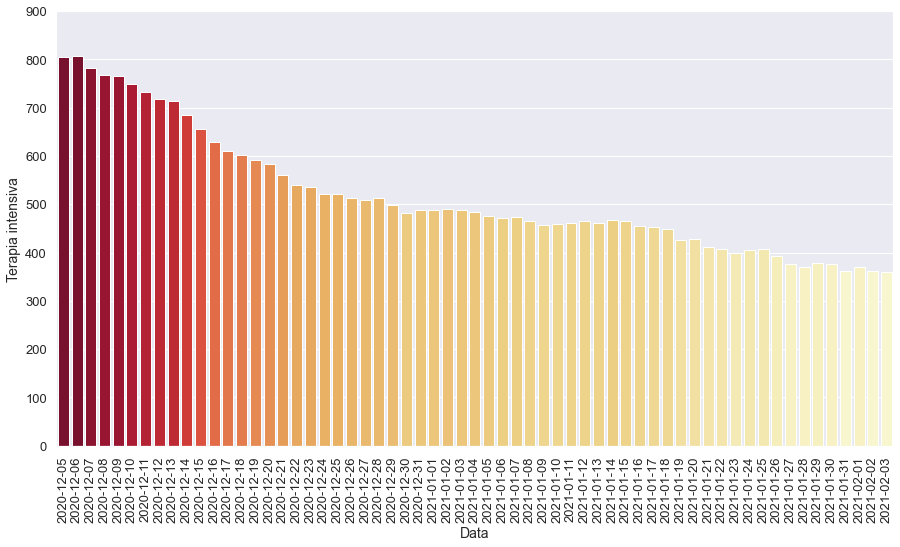

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

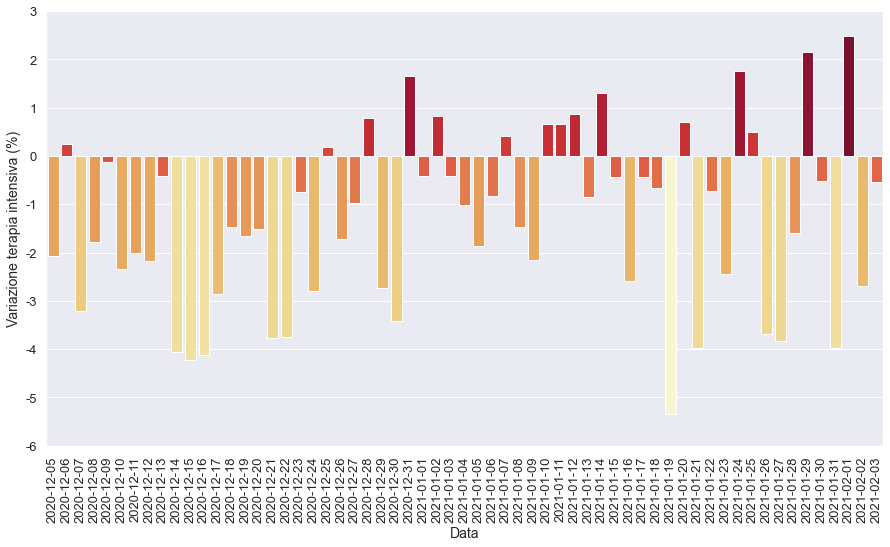

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

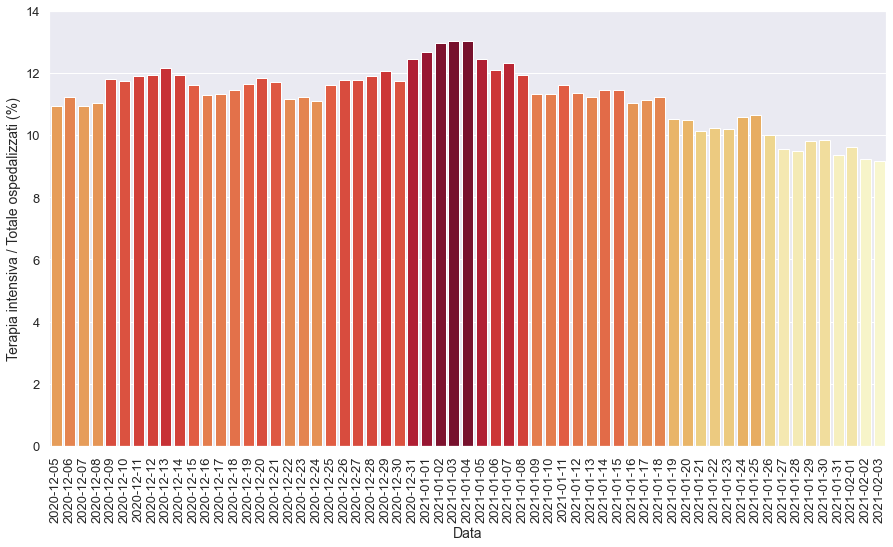

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

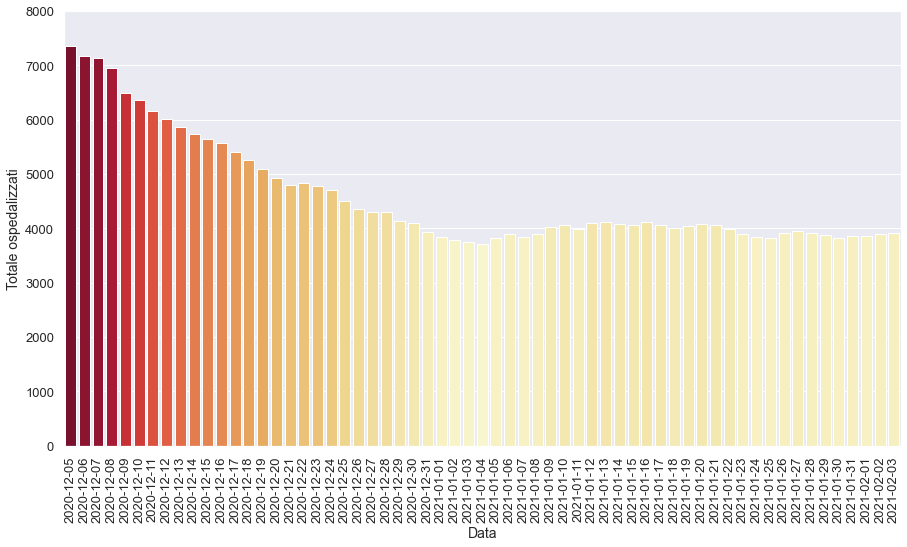

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

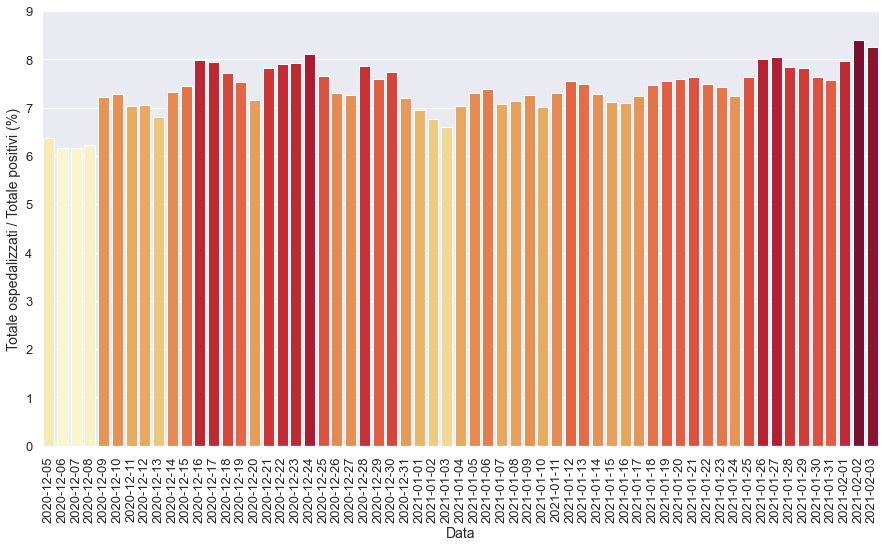

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

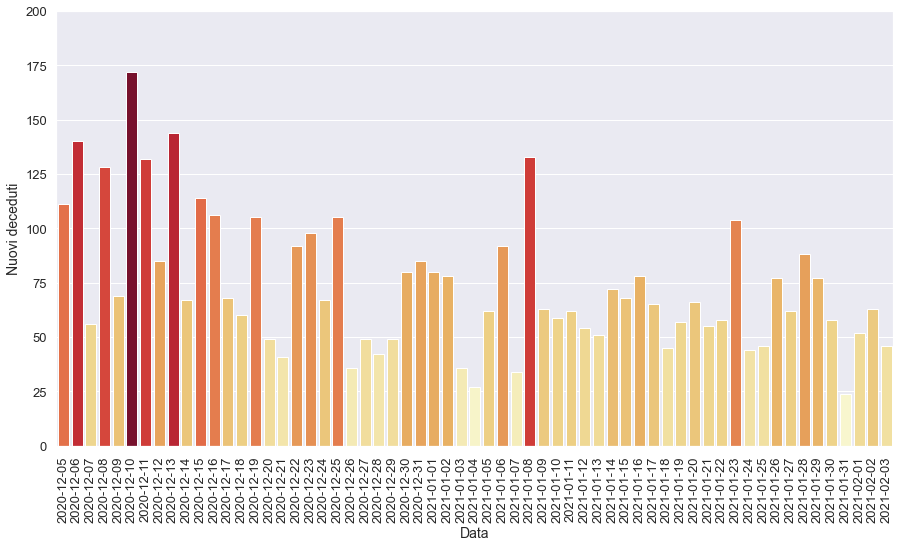

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

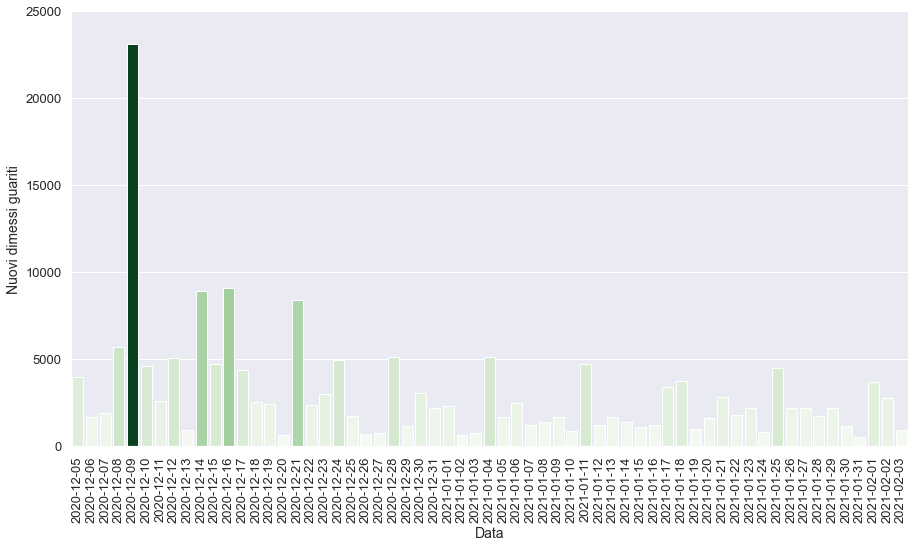

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-04T17:00:00,3,Lombardia,3227,484,3711,48976,52687,-4268,863,...,27.0,8161.0,3029.0,-4223.0,13.04,7.04,10.57,28.49,-1.02,-7.49
1,2021-01-05T17:00:00,3,Lombardia,3344,475,3819,48498,52317,-370,1338,...,62.0,12790.0,4611.0,-478.0,12.44,7.30,10.46,29.02,-1.86,-0.70
2,2021-01-06T17:00:00,3,Lombardia,3424,471,3895,48796,52691,374,2952,...,92.0,28462.0,8833.0,298.0,12.09,7.39,10.37,33.42,-0.84,0.71
3,2021-01-07T17:00:00,3,Lombardia,3363,473,3836,50406,54242,1551,2799,...,34.0,20331.0,7522.0,1610.0,12.33,7.07,13.77,37.21,0.42,2.94
4,2021-01-08T17:00:00,3,Lombardia,3436,466,3902,50775,54677,435,1963,...,133.0,18415.0,6411.0,369.0,11.94,7.14,10.66,30.62,-1.48,0.80
5,2021-01-09T17:00:00,3,Lombardia,3577,456,4033,51404,55437,760,2506,...,63.0,24847.0,8061.0,629.0,11.31,7.27,10.09,31.09,-2.15,1.39
6,2021-01-10T17:00:00,3,Lombardia,3598,459,4057,53741,57798,2361,3267,...,59.0,25011.0,9791.0,2337.0,11.31,7.02,13.06,33.37,0.66,4.26
7,2021-01-11T17:00:00,3,Lombardia,3522,462,3984,50523,54507,-3291,1488,...,62.0,13356.0,5224.0,-3218.0,11.60,7.31,11.14,28.48,0.65,-5.69
8,2021-01-12T17:00:00,3,Lombardia,3641,466,4107,50308,54415,-92,1146,...,54.0,15964.0,5384.0,-215.0,11.35,7.55,7.18,21.29,0.87,-0.17
9,2021-01-13T17:00:00,3,Lombardia,3651,462,4113,50850,54963,548,2245,...,51.0,31880.0,9584.0,542.0,11.23,7.48,7.04,23.42,-0.86,1.01


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

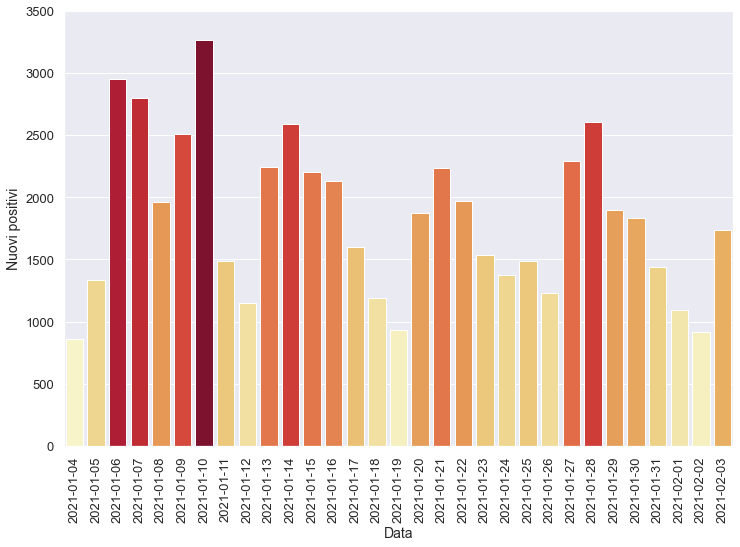

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

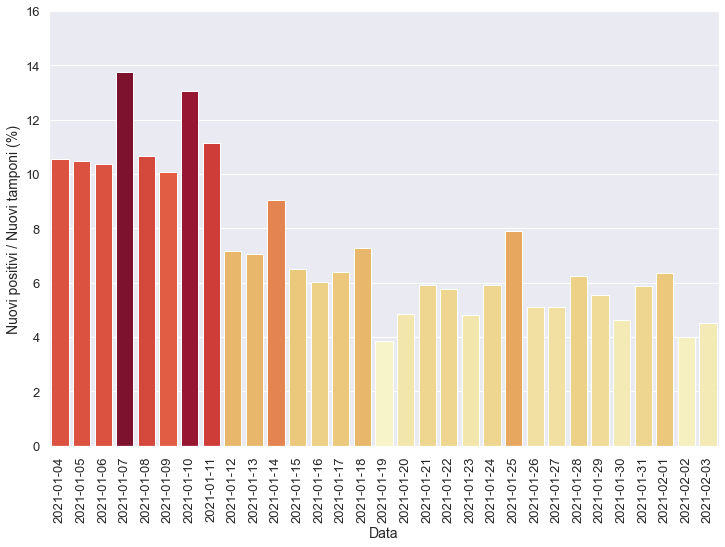

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

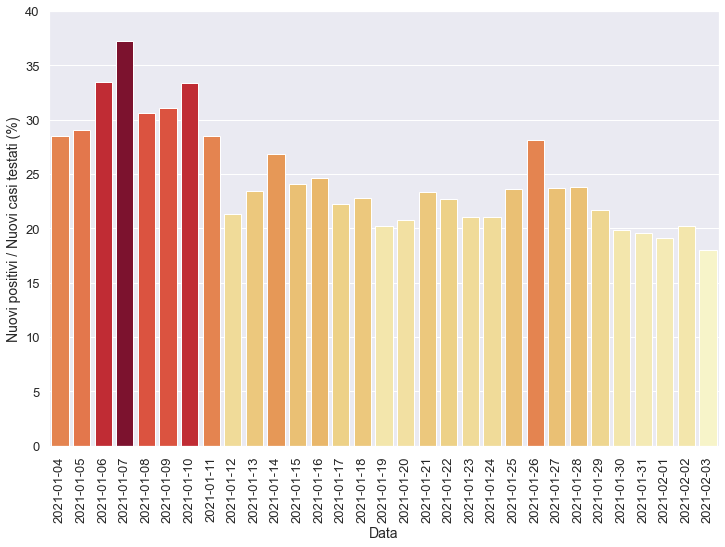

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

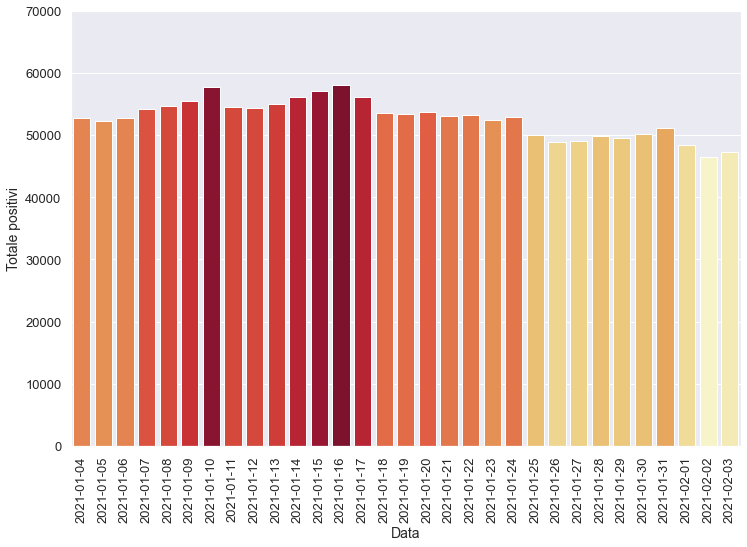

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

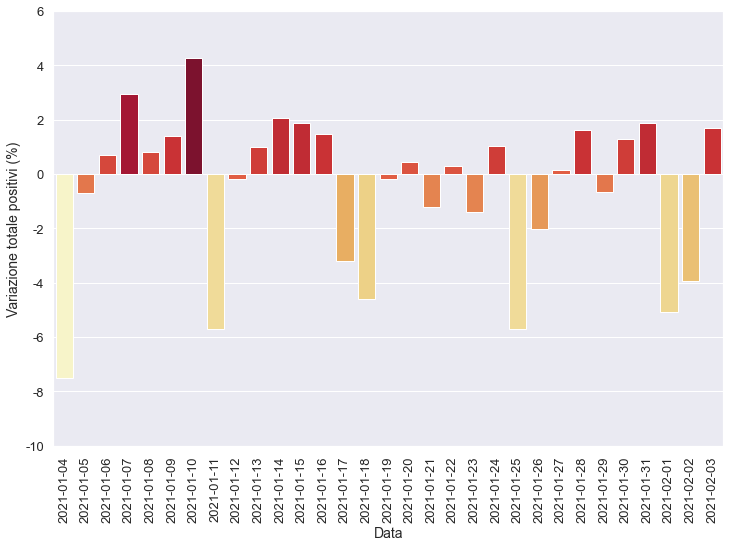

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

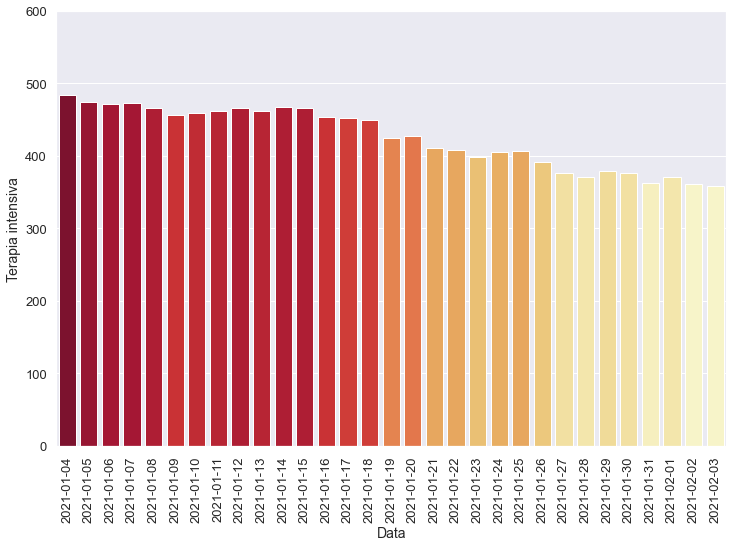

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

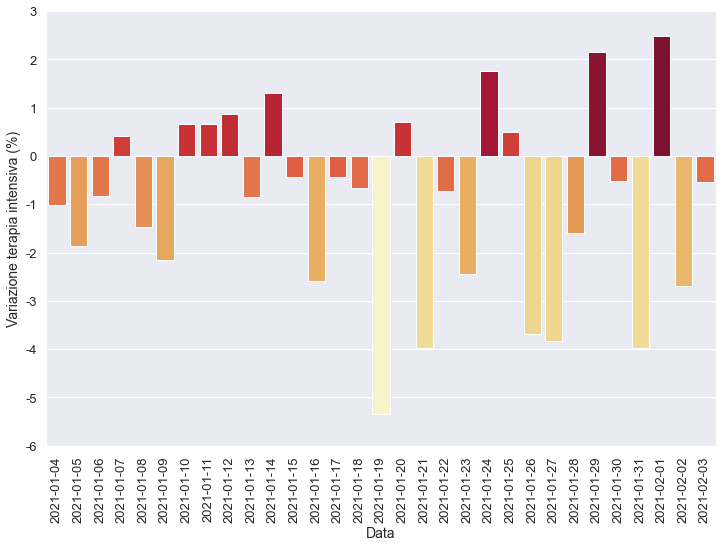

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

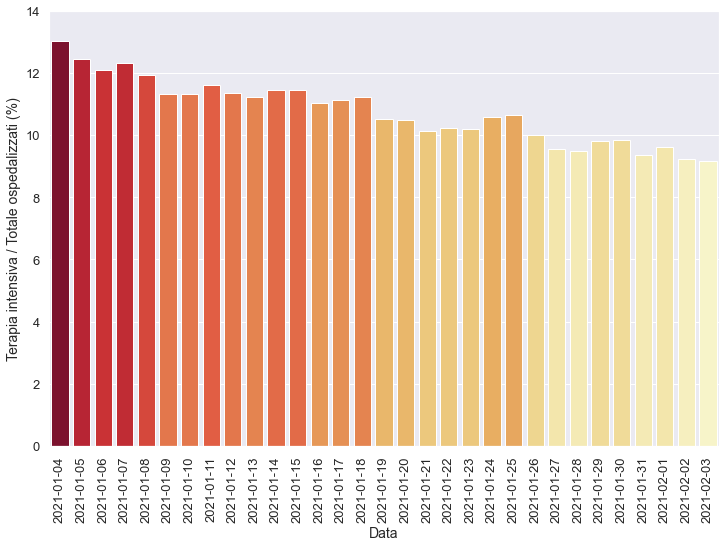

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

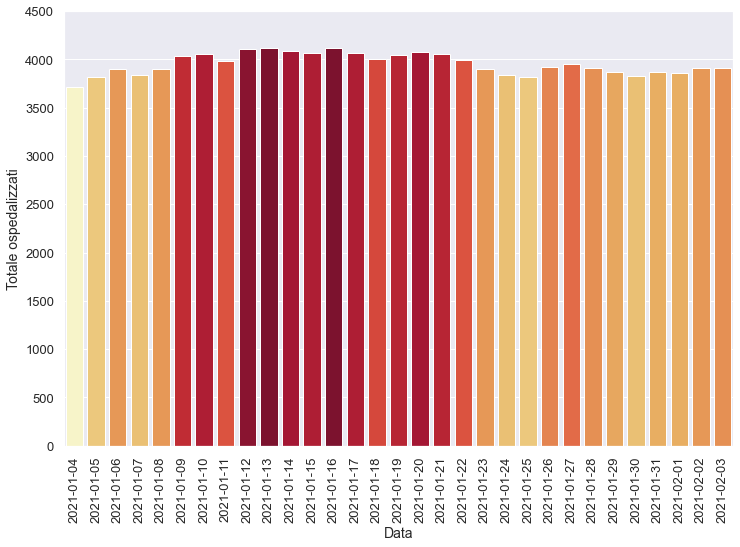

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

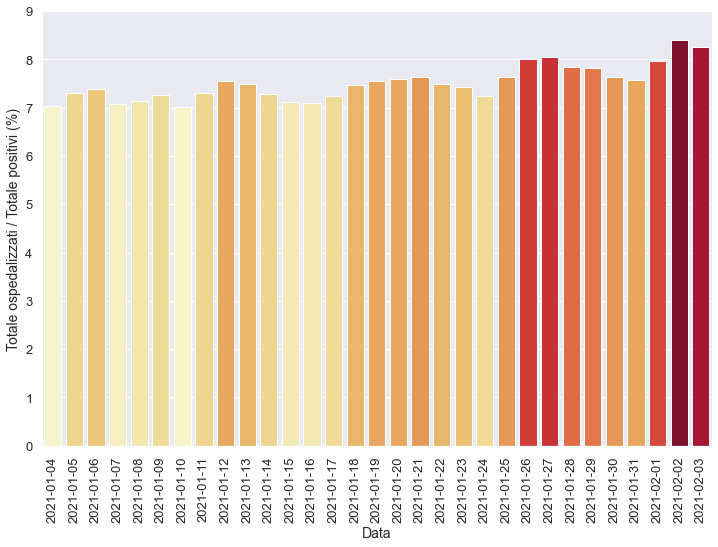

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

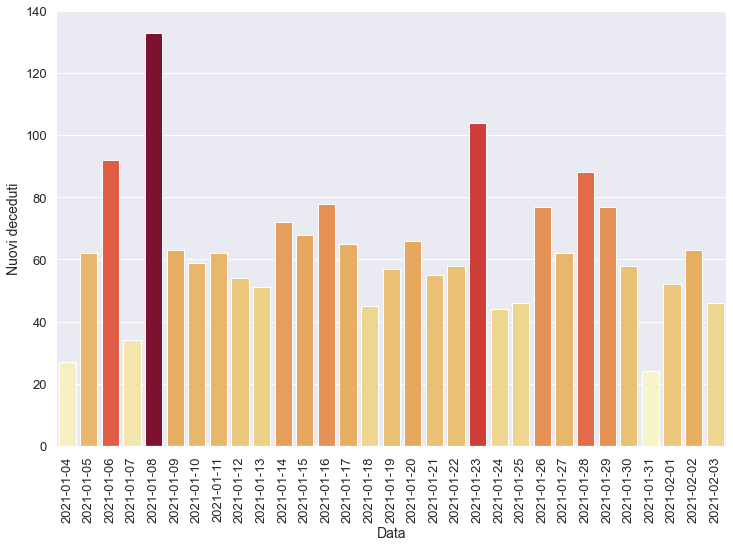

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

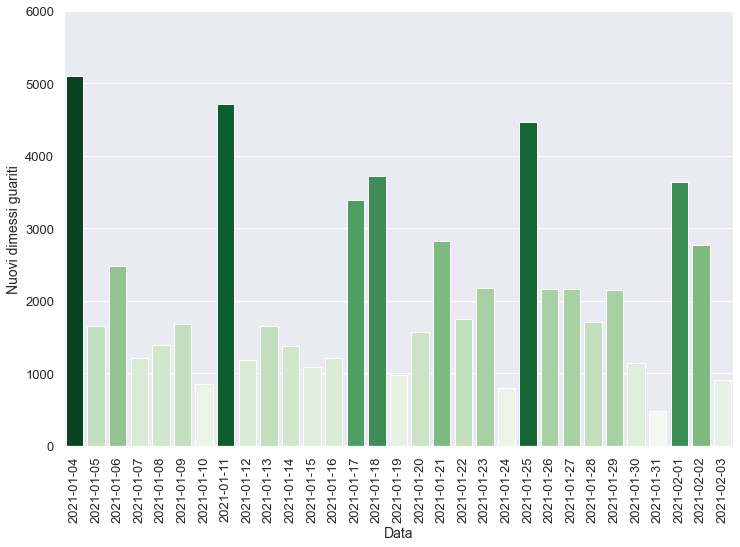

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-27T17:00:00,3,Lombardia,3573,377,3950,45088,49038,70,2293,...,62.0,44809.0,9661.0,42.0,9.54,8.05,5.12,23.73,-3.83,0.14
1,2021-01-28T17:00:00,3,Lombardia,3537,371,3908,45931,49839,801,2603,...,88.0,41677.0,10916.0,843.0,9.49,7.84,6.25,23.85,-1.59,1.63
2,2021-01-29T17:00:00,3,Lombardia,3490,379,3869,45645,49514,-325,1900,...,77.0,34156.0,8748.0,-286.0,9.80,7.81,5.56,21.72,2.16,-0.65
3,2021-01-30T17:00:00,3,Lombardia,3454,377,3831,46310,50141,627,1832,...,58.0,39462.0,9230.0,665.0,9.84,7.64,4.64,19.85,-0.53,1.27
4,2021-01-31T17:00:00,3,Lombardia,3503,362,3865,47212,51077,936,1438,...,24.0,24494.0,7364.0,902.0,9.37,7.57,5.87,19.53,-3.98,1.87
5,2021-02-01T17:00:00,3,Lombardia,3489,371,3860,44615,48475,-2602,1093,...,52.0,17151.0,5714.0,-2597.0,9.61,7.96,6.37,19.13,2.49,-5.09
6,2021-02-02T17:00:00,3,Lombardia,3544,361,3905,42654,46559,-1916,912,...,63.0,22699.0,4512.0,-1961.0,9.24,8.39,4.02,20.21,-2.70,-3.95
7,2021-02-03T17:00:00,3,Lombardia,3554,359,3913,43432,47345,786,1738,...,46.0,38651.0,9649.0,778.0,9.17,8.26,4.50,18.01,-0.55,1.69


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

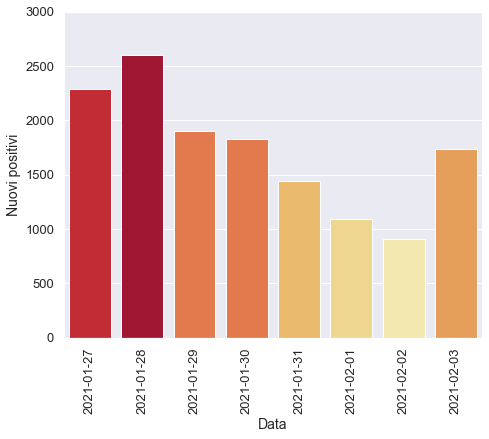

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

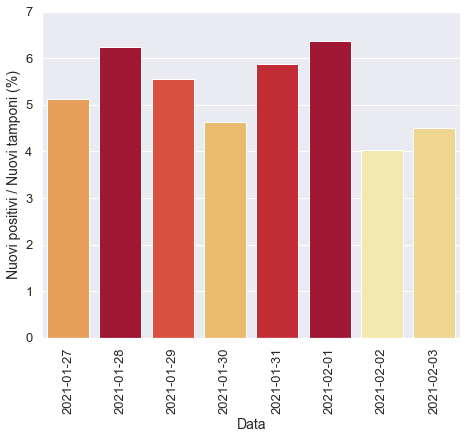

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

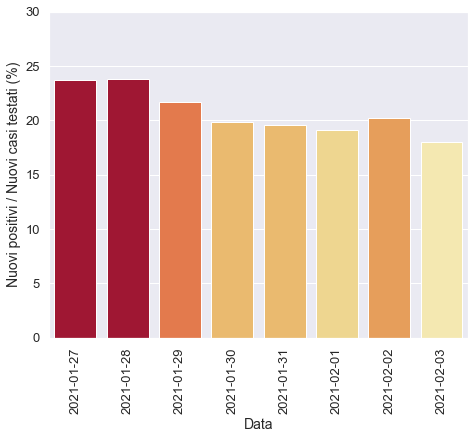

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

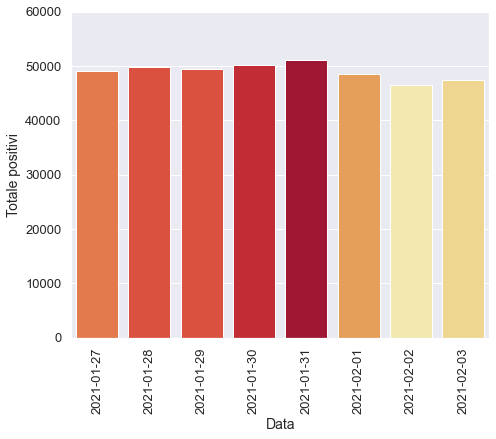

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

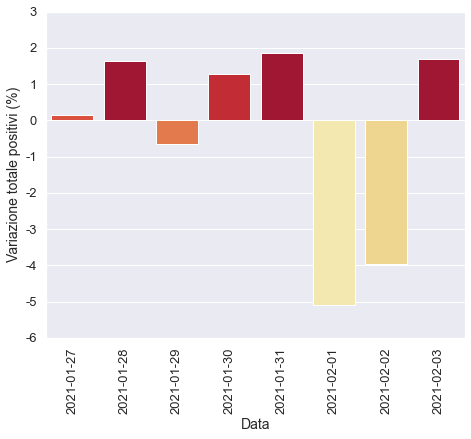

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

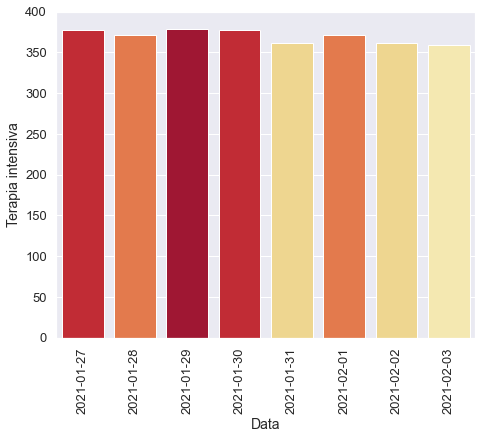

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

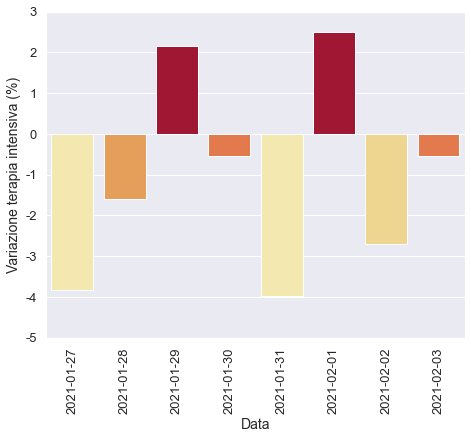

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

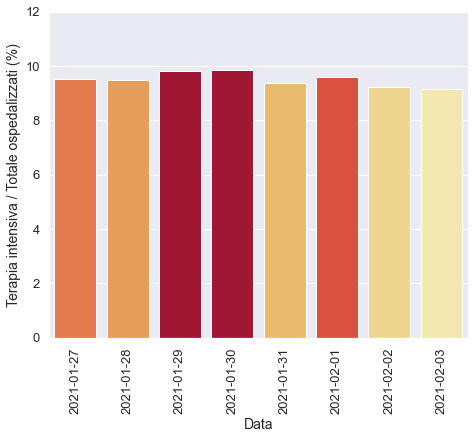

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

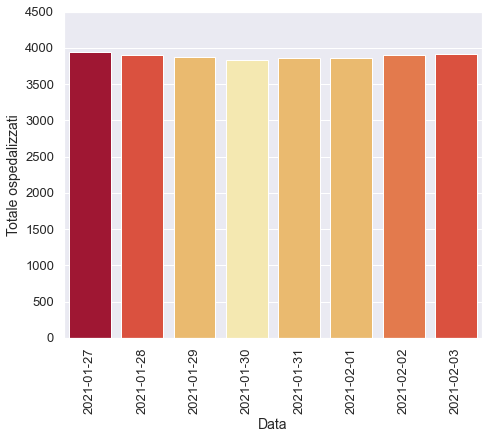

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

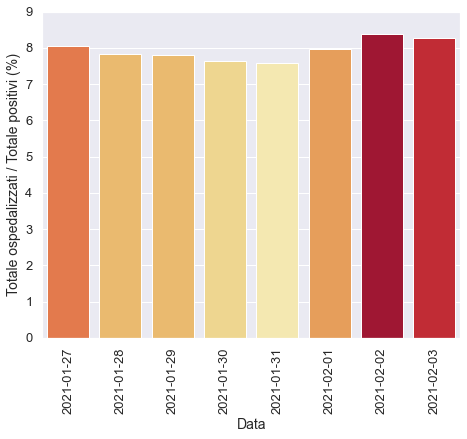

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

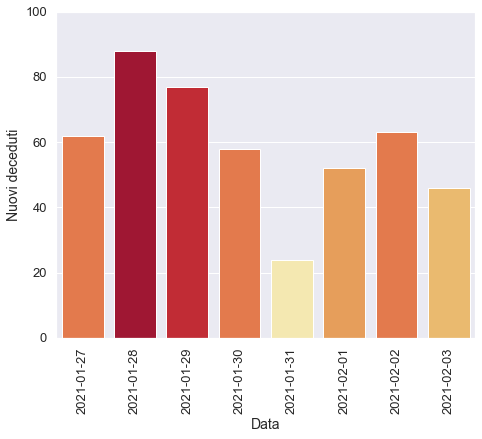

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

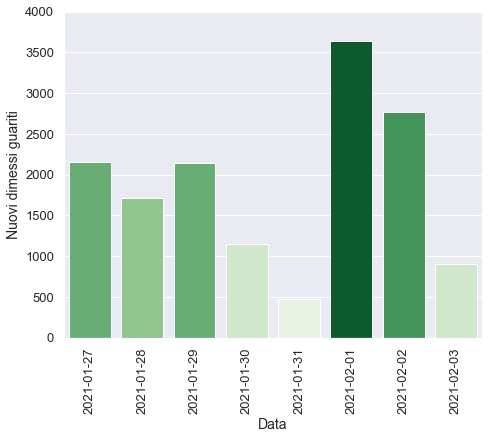

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)